# SENG 474 Final Project
# Simple Neural Network Model
This jupyter noteback file perfroms supervised machine learning via a neural network with a single hidden layer. This is ececuted by testing and plotting results of a regressor and classifier. Following, the classification model is analyzed for identified overfitting issues.

References:

1) https://keras.io/api/layers/

2) https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

3) https://keras.io/api/layers/regularization_layers/dropout/

4) https://keras.io/api/layers/regularizers/

In [6]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2, l1
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np


np.random.seed(1337)


df = pd.read_csv("content/combined_data_all_list_encoded_10.csv")

y = df["weighted_average_vote"].astype(float)
X = df.drop(
    ["weighted_average_vote"],
    axis=1,
).astype(float)


Epoch 1/10
65/65 [==============================] - 2s 7ms/step - loss: 5.5163 - val_loss: 4.5260
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 4.1980 - val_loss: 3.3320
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 3.0918 - val_loss: 2.4034
Epoch 4/10
65/65 [==============================] - 0s 2ms/step - loss: 2.2051 - val_loss: 1.7463
Epoch 5/10
65/65 [==============================] - 0s 2ms/step - loss: 1.6177 - val_loss: 1.3068
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 1.2165 - val_loss: 1.0588
Epoch 7/10
65/65 [==============================] - 0s 2ms/step - loss: 1.0049 - val_loss: 0.9500
Epoch 8/10
65/65 [==============================] - 0s 2ms/step - loss: 0.9160 - val_loss: 0.9074
Epoch 9/10
65/65 [==============================] - 0s 2ms/step - loss: 0.9023 - val_loss: 0.8898
Epoch 10/10
65/65 [==============================] - 0s 2ms/step - loss: 0.8866 - val_loss: 0.8785
Epoch 1/10
65/65 [=

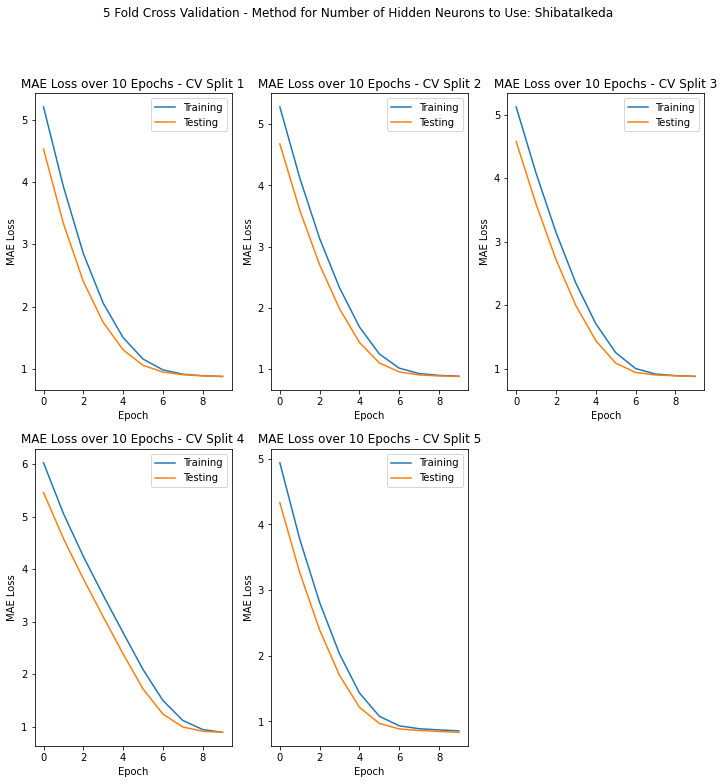

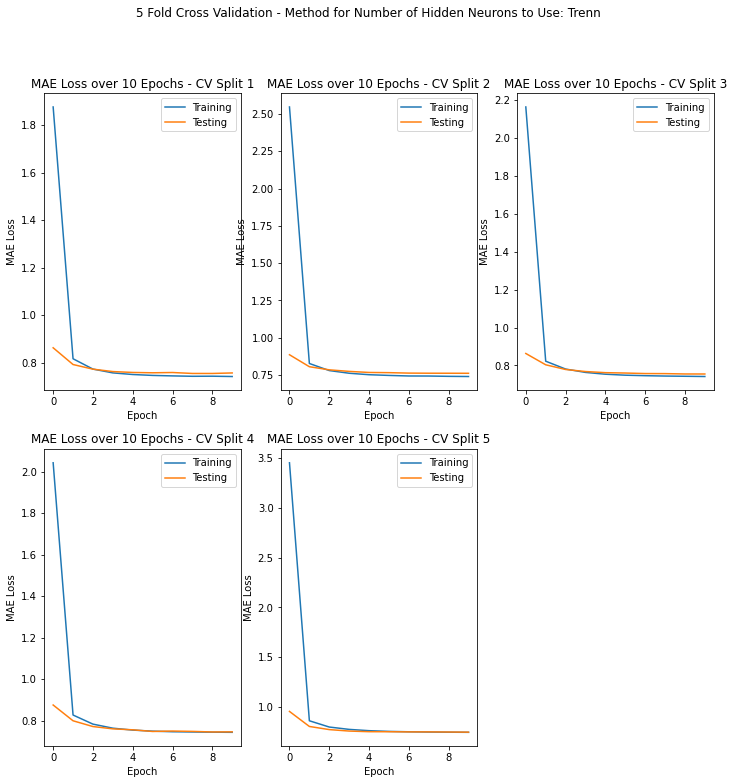

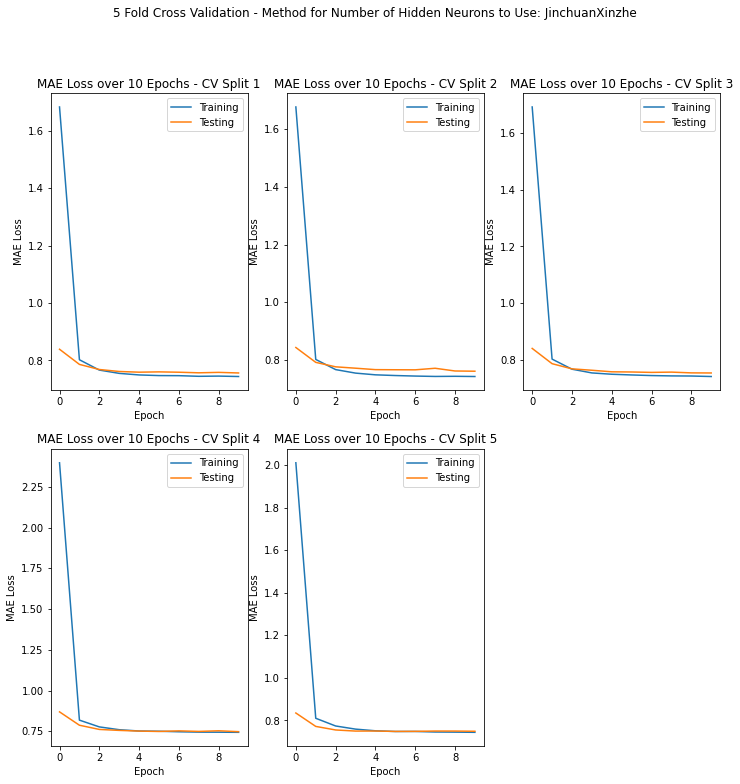

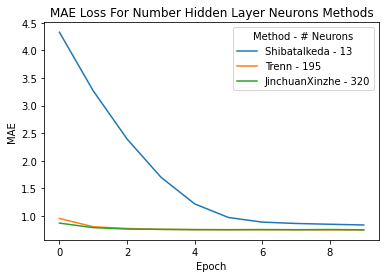

The most effective method for choosing the number of hidden layer neurons:
Method: Trenn
Number of Hidden Neurons: 195
Validation MAE: 0.7457640767097473



In [7]:
# This function analyzes the model outcomes to tuning the number of hidden neurons in the hidden layer based on the researched methods identified in the report
def simpleNNRegression(X, y): 

    num_input = X.shape[1] # 956 dimensions
    num_samples = X.shape[0] # 22623 smaples
    num_output = 1 # 1 output neuron due to regression
    num_hidden_layers = 1 # 1 hidden layer in this NN


    # Researched methods for optimizing the number of neurons in the hidden layer
    num_hidden_neuron_methods = {
        'ShibataIkeda': int(np.sqrt(num_input * num_output)),
        'Trenn': int(num_input + num_output - 0.5),
        'JinchuanXinzhe': int(num_input + np.sqrt(num_samples) / num_hidden_layers)
    }

    results = []

    for method in num_hidden_neuron_methods: # analyze each method

        plt.figure(figsize=(12,12))
        plt.suptitle("5 Fold Cross Validation - Method for Number of Hidden Neurons to Use: " + method)
        subplot_idx = 1
        kf = KFold(n_splits=5, random_state=True, shuffle=True) # run 5-fold cross validation on the dataset
        kfold_results = {}
        for training_idx, testing_idx in kf.split(X):
            
            X_train, X_test = X.iloc[training_idx], X.iloc[testing_idx]
            y_train, y_test = y.iloc[training_idx], y.iloc[testing_idx]

            model = keras.Sequential([
                keras.layers.Dense(num_hidden_neuron_methods[method], input_dim=num_input, activation='sigmoid', kernel_initializer='he_normal'), # single hidden layer
                keras.layers.Dense(num_output, activation="linear") # regression single neuron output layer
            ])

            model.compile(loss="mae", optimizer="adam")

            losses = model.fit(X_train, y_train, epochs=10, batch_size=num_input, validation_data=(X_test, y_test)).history # record the model history for plotting
            
            mae = min(losses['val_loss']) # find the minimum obtained MAE during validation testing
            kfold_results['cv_split_' + str(subplot_idx)] = {'val_mae': mae, 'num_hidden': num_hidden_neuron_methods[method], 'method': method, 'val_loss': losses['val_loss']}
            
            #plot the split's training and validation MAE over the 10 epochs
            plt.subplot(2,3,subplot_idx)
            plt.plot(losses['loss'])
            plt.plot(losses['val_loss'])
            plt.legend(['Training', 'Testing'], loc='upper right')
            plt.title('MAE Loss over 10 Epochs - CV Split ' + str(subplot_idx))
            plt.ylabel('MAE Loss')
            plt.xlabel('Epoch')
            subplot_idx += 1

        plt.draw()
        
        # Find and save the best performing 5-fold split for each method
        method_result = dict(sorted(kfold_results.items(), key=lambda result: result[1]['val_mae'], reverse=False))
        method_result = list(method_result.values())[0]
        results.append(method_result)
       
    plt.show()
    
    # Plot the validation MAE of the best 5-fold splits for each method
    for result in results:
        plt.plot(result['val_loss'], label=result['method'] + " - " + str(result['num_hidden']))

    plt.title('MAE Loss For Number Hidden Layer Neurons Methods')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(title="Method - # Neurons", loc="upper right")
    plt.show()

    best_method = min(results, key=lambda result: result['val_mae'])
    print("The most effective method for choosing the number of hidden layer neurons:")
    print("Method: "+ best_method['method'])
    print("Number of Hidden Neurons: "+ str(best_method['num_hidden']))
    print("Validation MAE: "+ str(best_method['val_mae']))
    print()

simpleNNRegression(X, y)

Epoch 1/10
65/65 [==============================] - 2s 13ms/step - loss: 0.1668 - accuracy: 0.0172 - val_loss: 0.0491 - val_accuracy: 0.0405
Epoch 2/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0488 - accuracy: 0.0382 - val_loss: 0.0491 - val_accuracy: 0.0379
Epoch 3/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0483 - accuracy: 0.0386 - val_loss: 0.0485 - val_accuracy: 0.0427
Epoch 4/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0479 - accuracy: 0.0465 - val_loss: 0.0482 - val_accuracy: 0.0376
Epoch 5/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0476 - accuracy: 0.0465 - val_loss: 0.0481 - val_accuracy: 0.0484
Epoch 6/10
65/65 [==============================] - 0s 8ms/step - loss: 0.0473 - accuracy: 0.0476 - val_loss: 0.0479 - val_accuracy: 0.0475
Epoch 7/10
65/65 [==============================] - 0s 7ms/step - loss: 0.0471 - accuracy: 0.0494 - val_loss: 0.0476 - val_accuracy: 0.0392
Epoch 8/10
65/65 [=

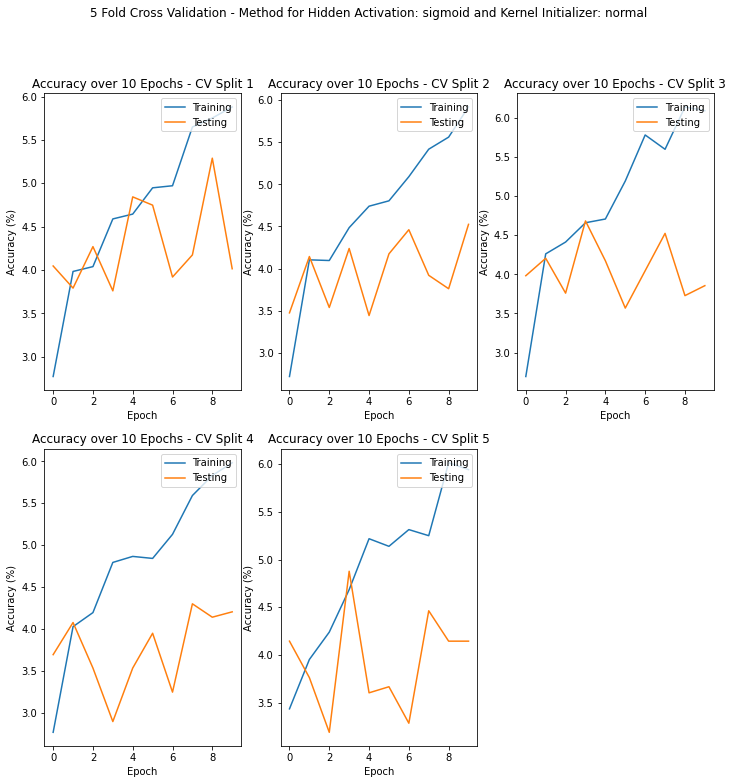

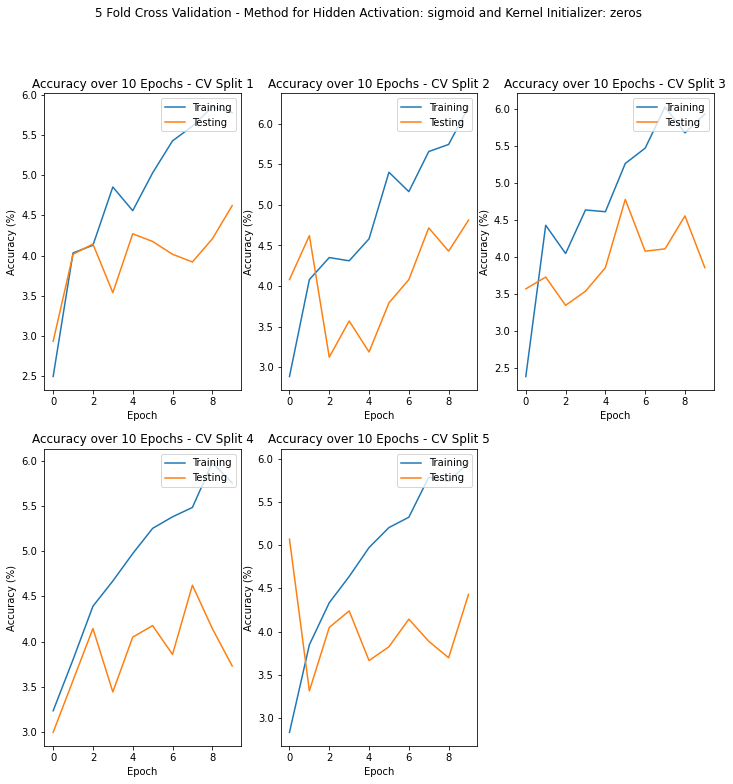

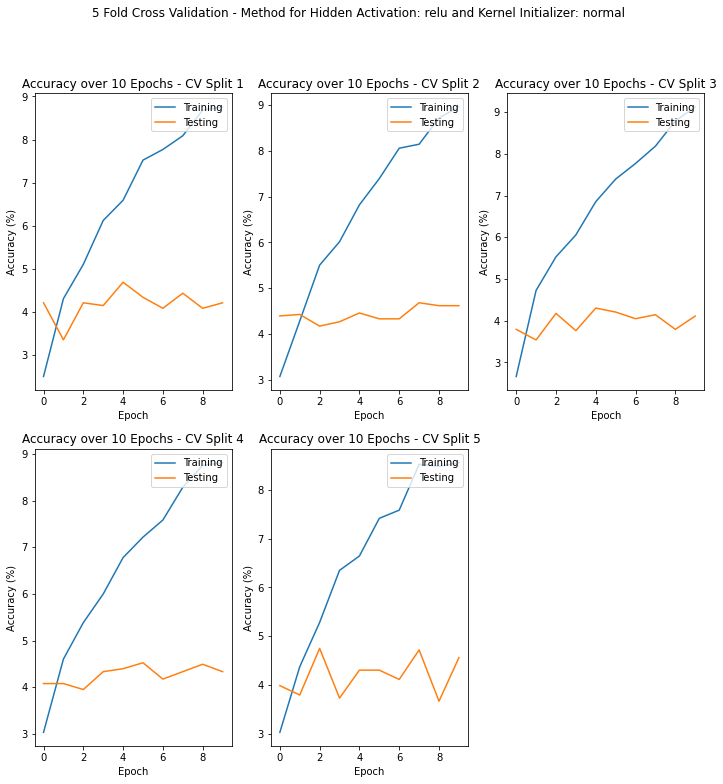

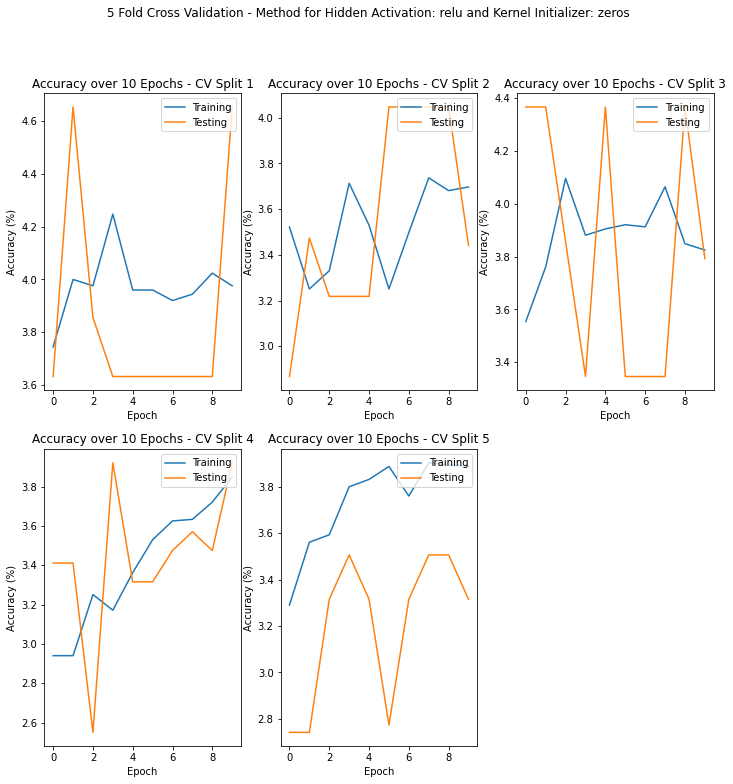

The most accurate set of hyperparameters is:
Activation: sigmoid
Kernel Initializer: normal
Validation Accuracy: 5.289993807673454



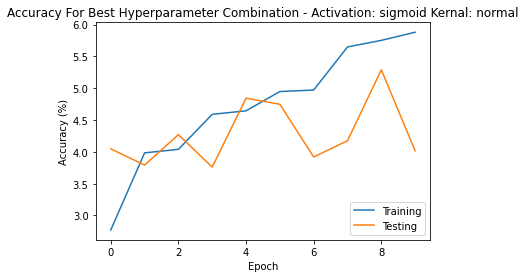

In [12]:
# This function performs hyperparameter tuning on the neural network in terms of its activation function and kernel initializer for the single hidden layer
def simpleNNClassification(X, y):

    num_input = X.shape[1] # 956 dimensions
    num_output = 100 # 100 output neurons for decimal tenths for ratings from 0.0-10.0
    # num_hidden = int(num_input + num_output - 0.5) # setting optimal number of hidden layer neurons from simpleNNRegression
    num_hidden = 500

    # Variety of hyperparameters to test different combinations of
    activation_hyperparameter = [
        'sigmoid',
        'relu'
    ]
    kernel_initializer_hyperparameters = [
        'normal',
        'he_uniform'
    ]


    results = []

    for activation in activation_hyperparameter:
        for kernel_initializer in kernel_initializer_hyperparameters:

            plt.figure(figsize=(12,12))
            plt.suptitle("5 Fold Cross Validation - Method for Hidden Activation: " + activation + " and Kernel Initializer: " + kernel_initializer)
            subplot_idx = 1
            kf = KFold(n_splits=5, random_state=True, shuffle=True) # 5-fold cross validation
            kfold_results = {}
            for training_idx, testing_idx in kf.split(X):
                
                X_train, X_test = X.iloc[training_idx], X.iloc[testing_idx]
                y_train, y_test = y.iloc[training_idx], y.iloc[testing_idx]

                # # Encode rating range 0.0-10.0 over 100 classes
                y_train = to_categorical(y_train * 10, 100)
                y_test = to_categorical(y_test * 10, 100)
               

                model = keras.Sequential([
                    keras.layers.Dense(num_hidden, input_dim=num_input, activation=activation, kernel_initializer=kernel_initializer), # hidden layer
                    keras.layers.Dense(num_output, activation="softmax") # 100 classes output layer
                ])
                
                model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

                accuracies = model.fit(X_train, y_train, epochs=10, batch_size=num_input, validation_data=(X_test, y_test)).history # save the model history for later
                
                # scale accuracy up to 0-100
                accuracies['accuracy'] = [i * 100 for i in accuracies['accuracy']]
                accuracies['val_accuracy'] = [i * 100 for i in accuracies['val_accuracy']] 
            
                accuracy = max(accuracies['val_accuracy'])
                kfold_results['cv_split_' + str(subplot_idx)] = {'accuracy': accuracy, 'activation': activation, 'kernel_initializer': kernel_initializer,'train_accuracy': accuracies['accuracy'], 'val_accuracy': accuracies['val_accuracy']}

                #Plot the training and testing accuracies over the 10 epochs
                plt.subplot(2,3,subplot_idx)
                plt.plot(accuracies['accuracy'])
                plt.plot(accuracies['val_accuracy'])
                plt.legend(['Training', 'Testing'], loc='upper right')
                plt.title('Accuracy over 10 Epochs - CV Split ' + str(subplot_idx))
                plt.ylabel('Accuracy (%)')
                plt.xlabel('Epoch')
                
                subplot_idx += 1
                

            plt.draw()
            
            # save the top validation accuracy for later
            method_result = dict(sorted(kfold_results.items(), key=lambda result: result[1]['accuracy'], reverse=True))
            method_result = list(method_result.values())[0]
            results.append(method_result)
            

    plt.show()
    
    best_method = max(results, key=lambda result: result['accuracy']) # find the best hyperparameters
    print("The most accurate set of hyperparameters is:")
    print("Activation: "+ best_method['activation'])
    print("Kernel Initializer: "+ best_method['kernel_initializer'])
    print("Validation Accuracy: "+ str(best_method['accuracy']))
    print()

    # Plot the best 5-fold split of the best hyperparameters
    plt.plot(best_method['train_accuracy'])
    plt.plot(best_method['val_accuracy'])
    plt.legend(['Training', 'Testing'], loc='lower right')
    plt.title('Accuracy For Best Hyperparameter Combination - Activation: ' + best_method['activation'] + ' Kernal: ' + best_method['kernel_initializer'])
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Epoch')
    plt.show()

simpleNNClassification(X, y)

Epoch 1/10
25/25 [==============================] - 2s 29ms/step - loss: 0.5775 - accuracy: 0.0147 - val_loss: 0.1639 - val_accuracy: 0.0288
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 0.1587 - accuracy: 0.0130 - val_loss: 0.0935 - val_accuracy: 0.0393
Epoch 3/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0924 - accuracy: 0.0239 - val_loss: 0.0665 - val_accuracy: 0.0403
Epoch 4/10
25/25 [==============================] - 0s 13ms/step - loss: 0.0680 - accuracy: 0.0307 - val_loss: 0.0565 - val_accuracy: 0.0374
Epoch 5/10
25/25 [==============================] - 0s 13ms/step - loss: 0.0593 - accuracy: 0.0338 - val_loss: 0.0534 - val_accuracy: 0.0401
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0564 - accuracy: 0.0361 - val_loss: 0.0525 - val_accuracy: 0.0394
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0550 - accuracy: 0.0378 - val_loss: 0.0522 - val_accuracy: 0.0401
Epoch 8/10
25

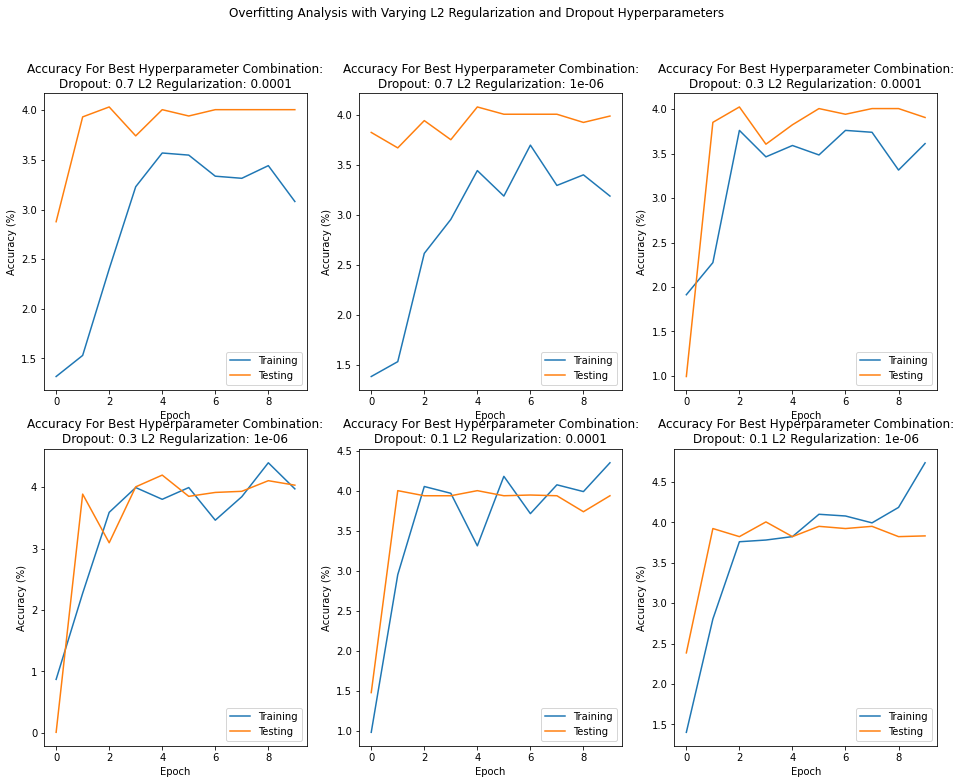

In [11]:
# This function attempts to improve the overfitting occuring in simpleNNClassification by hyperparameter tuning L2 regularization and Dropout layer paramaters on the hidden layer
def overfittingAnalysis(X, y):

    num_input = X.shape[1] # 956 dimensions
    num_output = 100 # 100 output neurons for decimal tenths for ratings from 0.0-10.0
    num_hidden = int(num_input + num_output - 0.5)

    # setting optimal hyperparameters from simpleNNClassification
    activation = 'sigmoid' 
    kernel_initializer = 'normal'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # split the dataset into training and testing
   
    # Encode rating range 0.0-10.0 over 100 classes
    y_train = to_categorical(y_train * 10, 100)
    y_test = to_categorical(y_test * 10, 100)

    # Hyperparameters for tuning
    l2_regularizers = [0.0001, 0.000001]
    dropouts = [0.7, 0.3, 0.1]


    plt.figure(figsize=(16,12))
    plt.suptitle("Overfitting Analysis with Varying L2 Regularization and Dropout Hyperparameters")

    subplot_idx = 1
    for dropout_value in dropouts:
        for l2_value in l2_regularizers:
            
            # Create the NN
            model = keras.Sequential([
                keras.layers.Dense(num_hidden, input_dim=num_input, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=l1(l2_value)),
                keras.layers.Dropout(dropout_value),
                keras.layers.Dense(num_output, activation="softmax") # 100 classes output layer
            ])
            
            model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

            accuracies = model.fit(X_train, y_train, epochs=10, batch_size=num_input, validation_data=(X_test, y_test)).history # record the model's history over 10 epochs

            # scale accuracy up to 0-100
            accuracies['accuracy'] = [i * 100 for i in accuracies['accuracy']]
            accuracies['val_accuracy'] = [i * 100 for i in accuracies['val_accuracy']] 

            #Plot the model's training and testing accuracies over 10 epochs
            plt.subplot(2,3,subplot_idx)
            plt.plot(accuracies['accuracy'])
            plt.plot(accuracies['val_accuracy'])
            plt.legend(['Training', 'Testing'], loc='lower right')
            plt.title('Accuracy For Best Hyperparameter Combination:\nDropout: ' + str(dropout_value) + ' L2 Regularization: ' + str(l2_value))
            plt.ylabel('Accuracy (%)')
            plt.xlabel('Epoch')
            
            subplot_idx += 1
            
    plt.show()


overfittingAnalysis(X,y)